## 1. 背景及所要研究的问题 ：
   数据来源于Kaggle网站，泰坦尼克号沉没事件造成了2224名乘客和船员当中的1502人丧生，这份数据中包括了当时泰坦尼克号上部分人的年龄、性别、是否生存、船舱等级等详细的信息。这篇文章将会根据这些数据试图分析：在泰坦尼克事件中具有哪些特征的人群具有高的生存率？

## 2. 加载模块及数据

加载分析所用模块及函数，加载绘图模块

In [44]:
import matplotlib.pyplot as plti
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
from pandas import DataFrame, Series


读取数据

In [45]:
filename = 'titanic_data.csv'
titanic_df = pd.read_csv(filename)

## 3. 初步浏览数据及数据整理

In [46]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


将性别数据由string: Female & Male转化为integer 0和1,便于后面分析男女比例 




In [48]:
sex_map = {'female': 0, 'male': 1}
titanic_df['Sex'] = titanic_df['Sex'].map(sex_map)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


Emarked值缺失两个，先根据Embarked值进行分类并查数量

In [49]:
titanic_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [50]:
titanic_df.groupby(['Embarked'],as_index = False).count()

,Embarked,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,C,168,168,168,168,168,130,168,168,168,168,69
1,Q,77,77,77,77,77,28,77,77,77,77,4
2,S,644,644,644,644,644,554,644,644,644,644,129


上面结果显示644人的Embarked值为'S',占绝大多数，所以用S来补充缺失的Embarked值

In [51]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')

Age和Cabin缺失较多，不进行补全，以免后面分析失真。再次总览一下数据情况如下：

In [52]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB


## 4. 数据分析:

**4.1 先不考虑各变量之间的相互影响，各变量分别进行分析**

各变量总体统计数据如下：

In [53]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


以上表可以看出：
1. 平均生存率为38.3%， 与Kaggle网站显示的全体2224人的生存率40%相当。
2. 船舱等级中位数为3，均值为2.3， 说明大多数为低等舱位。
3. 性别均值为0.647，说明男性较多

下面将对两个连续变量Age和Fare进行图形分析


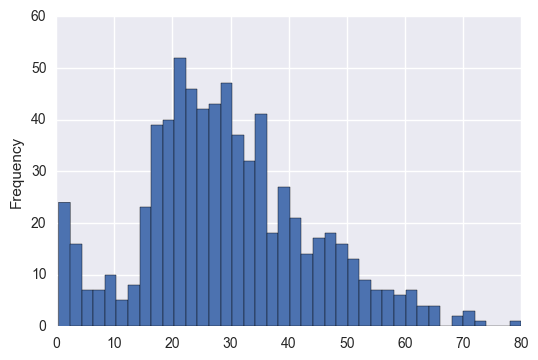

In [54]:
titanic_df['Age'].plot.hist(bins = 40)

上面图可以看出年龄总体呈正态分布，但是0至10岁有一个明显的outlier

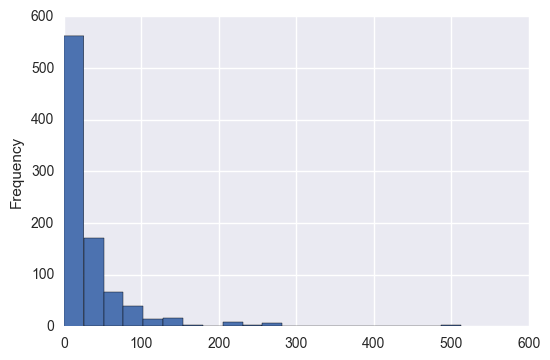

In [55]:
titanic_df['Fare'].plot.hist(bins = 20)

上面图片说明绝大部分人付费较低，这和大部分人船舱等级较低是相合的

**4.2 以下通过图表方式研究各变量和生存情况(Survived)的关系**

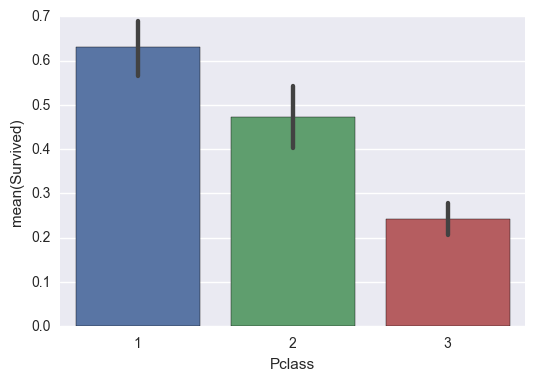

In [56]:
sns.barplot('Pclass', 'Survived', data = titanic_df)

船舱等级和生存率有一定的相关性

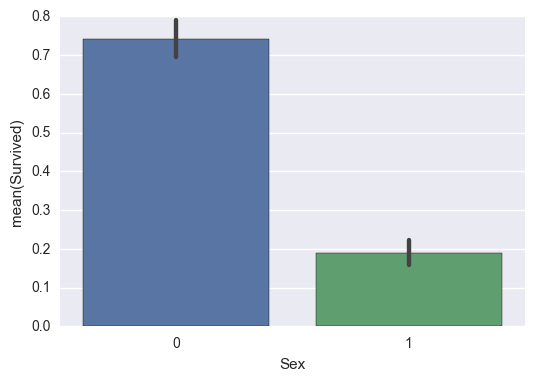

In [57]:
sns.barplot('Sex', 'Survived', data = titanic_df)

性别和生存率有较大的可能有相关性

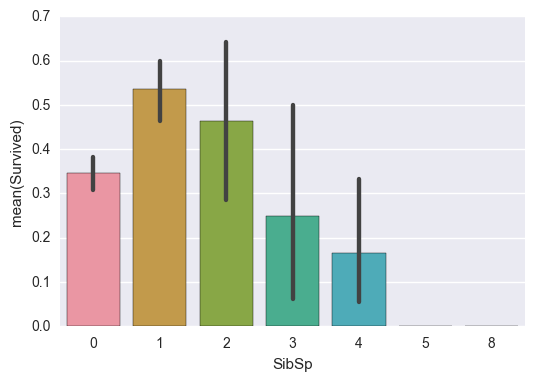

In [58]:
sns.barplot('SibSp', 'Survived', data = titanic_df)

Sibsp指登船的兄弟姐妹或者配偶，上图显示有较少的sibsp的生存率最高，没有sibsp或sibsp较多生存率低

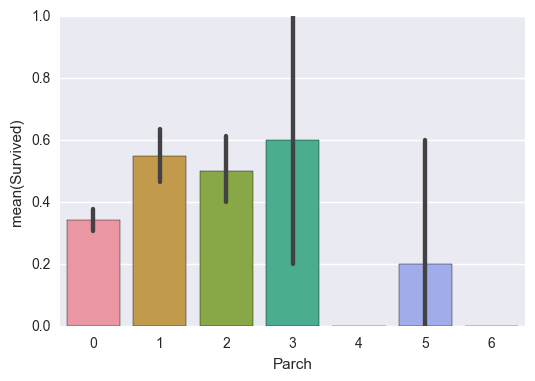

In [59]:
sns.barplot('Parch', 'Survived', data = titanic_df)

Parch指同行的父母或者子女个数，上图不能看出明显的Parch和生存率的相关性。

对于两个连续变量Fare以及Age分别与Survived的关系，采用列表方式进行分析

In [60]:
titanic_df[["Fare", "Survived"]].groupby(['Survived'], as_index = False).mean().sort_values(by='Survived', ascending=False)

,Survived,Fare
1,1,48.395408
0,0,22.117887


看来Fare（费用）还是和生存率可能有一定的相关性，这和头等舱生存率较高相合。

In [61]:
titanic_df[["Age", "Survived"]].groupby(['Survived'], as_index = False).mean().sort_values(by='Survived', ascending=False)

,Survived,Age
1,1,28.343690
0,0,30.626179


年龄看不出明显的和生存情况的相关性。我们可以再看一下面两张图生存组和非生存组年龄的分部情况。

生存组年龄分布情况如下图

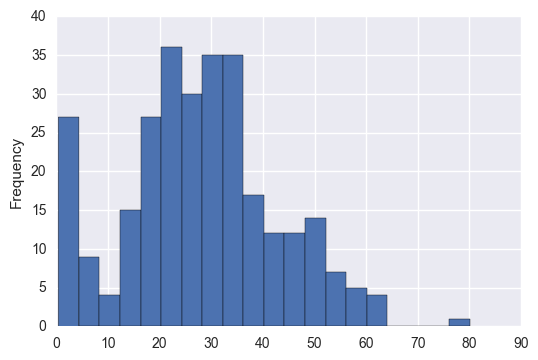

In [62]:
survived_group = titanic_df.groupby(["Survived"]).get_group(1)
survived_group['Age'].plot.hist(bins = 20)

非生存组的年龄分布情况

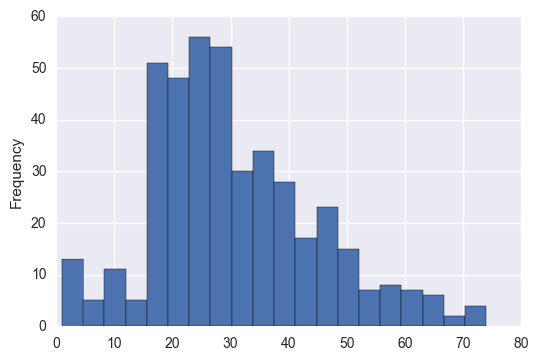

In [63]:
nonsurvived_group = titanic_df.groupby(["Survived"]).get_group(0)
nonsurvived_group['Age'].plot.hist(bins = 20)

通过以上两个组的年龄分布分析可以看出，小于十岁的孩子生存率明显较高，最大年龄80岁的人也在生存组。

对于两个较明显可能和生存率有相关性的变量Sex和Pclass，我们把它们放在同一张图表中看看和生存率的关系

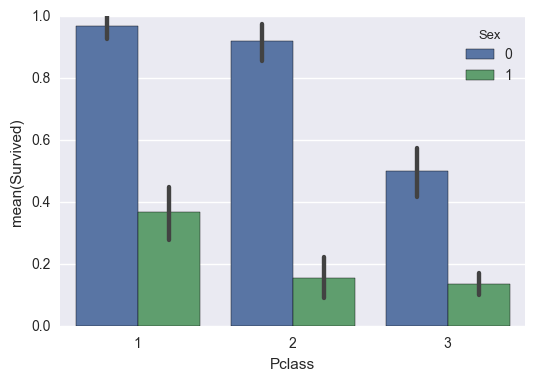

In [64]:
sns.barplot('Pclass', 'Survived',hue="Sex", data = titanic_df)

上面图表可以看出，头等舱和二等舱女性的生存率达到了惊人的90%以上，即使是三等舱也有50%左右。而男性的生存率最高也没有超过40%，二等和三等舱更是不超过20%。

## 5. 总结

本文并未采用更详细的统计分析及机器学习手段进行生存率的预测，无法得出更加确定的相关性信息。但是通过以上的分析我们还是可以看出一些变量和生存率有可能相关，请看一下分析总结：
1. 船舱等级可能和生存率有相关性，说明富人还是可能有更多的求生机会。
2. 女性看来有更加多的求生机会，从数据上看头等舱和二等舱的生存率都达到了90%以上。相比之下头等舱男性的生存率也不到40%，二三等舱就更低了，不超过20%。女士优先还是体现得很明显。
3. 从总体上来看，年龄和生存率没有明显关系，但是也可以看出低龄儿童得到了较好的保护。


## 6. 参考资料

1. http://www.webpages.uidaho.edu/~stevel/504/Pandas%20DataFrame%20Notes.pdf
